In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
time_range = pd.date_range(start="2022-01-01", 
                           periods=720, 
                           freq="H")

time_range[:5]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2756\2849204223.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(start="2022-01-01",


DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='h')

In [3]:
np.random.seed(42)

synthetic = pd.DataFrame({
    "time": time_range,
    "Fridge [kW]": np.random.uniform(0.1, 0.3, 720),
    "AC [kW]": np.random.uniform(0.5, 2.0, 720),
    "Lights [kW]": np.random.uniform(0.05, 0.2, 720),
    "Microwave [kW]": np.random.uniform(0.8, 1.5, 720)
})

synthetic.head()


,time,Fridge [kW],AC [kW],Lights [kW],Microwave [kW]
0,2022-01-01 00:00:00,0.174908,1.907511,0.195487,1.255803
1,2022-01-01 01:00:00,0.290143,0.771850,0.064085,1.234650
2,2022-01-01 02:00:00,0.246399,0.599744,0.150890,1.046662
3,2022-01-01 03:00:00,0.219732,1.611681,0.116563,1.389013
4,2022-01-01 04:00:00,0.131204,1.361710,0.180221,1.129901


In [4]:
synthetic["Total_Power [kW]"] = (
    synthetic["Fridge [kW]"] +
    synthetic["AC [kW]"] +
    synthetic["Lights [kW]"] +
    synthetic["Microwave [kW]"]
)

synthetic.head()


,time,Fridge [kW],AC [kW],Lights [kW],Microwave [kW],Total_Power [kW]
0,2022-01-01 00:00:00,0.174908,1.907511,0.195487,1.255803,3.533709
1,2022-01-01 01:00:00,0.290143,0.771850,0.064085,1.234650,2.360728
2,2022-01-01 02:00:00,0.246399,0.599744,0.150890,1.046662,2.043696
3,2022-01-01 03:00:00,0.219732,1.611681,0.116563,1.389013,3.336988
4,2022-01-01 04:00:00,0.131204,1.361710,0.180221,1.129901,2.803036


In [5]:
synthetic['time'] = pd.to_datetime(synthetic['time'])
synthetic.set_index('time', inplace=True)

synthetic.head()


,Fridge [kW],AC [kW],Lights [kW],Microwave [kW],Total_Power [kW]
time,,,,,
2022-01-01 00:00:00,0.174908,1.907511,0.195487,1.255803,3.533709
2022-01-01 01:00:00,0.290143,0.771850,0.064085,1.234650,2.360728
2022-01-01 02:00:00,0.246399,0.599744,0.150890,1.046662,2.043696
2022-01-01 03:00:00,0.219732,1.611681,0.116563,1.389013,3.336988
2022-01-01 04:00:00,0.131204,1.361710,0.180221,1.129901,2.803036


In [6]:
hourly = synthetic.resample('h').mean()
hourly.head()


,Fridge [kW],AC [kW],Lights [kW],Microwave [kW],Total_Power [kW]
time,,,,,
2022-01-01 00:00:00,0.174908,1.907511,0.195487,1.255803,3.533709
2022-01-01 01:00:00,0.290143,0.771850,0.064085,1.234650,2.360728
2022-01-01 02:00:00,0.246399,0.599744,0.150890,1.046662,2.043696
2022-01-01 03:00:00,0.219732,1.611681,0.116563,1.389013,3.336988
2022-01-01 04:00:00,0.131204,1.361710,0.180221,1.129901,2.803036


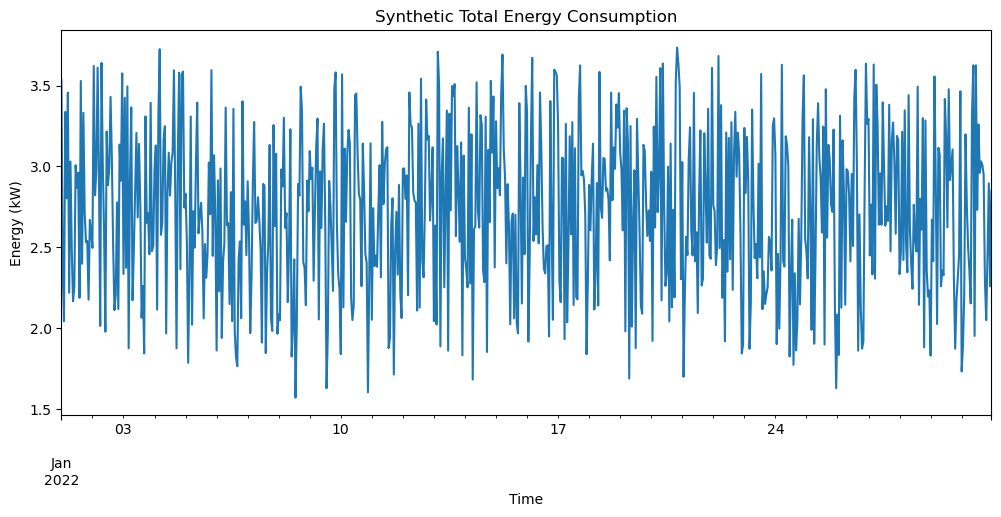

In [7]:
plt.figure(figsize=(12,5))
synthetic["Total_Power [kW]"].plot()
plt.title("Synthetic Total Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy (kW)")
plt.show()


In [8]:
mean_vals = synthetic.mean()
std_vals = synthetic.std()

mean_vals


Fridge [kW]         0.198699
AC [kW]             1.251421
Lights [kW]         0.125528
Microwave [kW]      1.147637
Total_Power [kW]    2.723284
dtype: float64

In [9]:
std_vals


Fridge [kW]         0.059043
AC [kW]             0.441597
Lights [kW]         0.042988
Microwave [kW]      0.203486
Total_Power [kW]    0.505910
dtype: float64

In [10]:
synthetic.corr()


,Fridge [kW],AC [kW],Lights [kW],Microwave [kW],Total_Power [kW]
Fridge [kW],1.000000,0.021496,-0.078320,0.013062,0.134069
AC [kW],0.021496,1.000000,0.041418,0.073393,0.908426
Lights [kW],-0.078320,0.041418,1.000000,-0.091712,0.075095
Microwave [kW],0.013062,0.073393,-0.091712,1.000000,0.460014
Total_Power [kW],0.134069,0.908426,0.075095,0.460014,1.000000


In [11]:
mean_vals.sort_values(ascending=False)


Total_Power [kW]    2.723284
AC [kW]             1.251421
Microwave [kW]      1.147637
Fridge [kW]         0.198699
Lights [kW]         0.125528
dtype: float64